<a href="https://colab.research.google.com/github/seohyun126/2025-Cheonan-DataIdea-Competition/blob/main/SEM%2CGWR_%EC%B2%9C%EC%95%88%EC%8B%9C_%EC%B9%A8%EC%88%98_%ED%94%BC%ED%95%B4%2C_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EC%84%A4%EA%B3%84%ED%95%9C_%EC%A7%80%EC%97%AD_%EB%8C%80%EC%9D%91_%EB%B0%A9%EC%95%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
final=gpd.read_file('/content/drive/MyDrive/천안시_공모전/final_lisa/final_lisa.shp',encoding='cp949')

In [ ]:
! pip install pysal geopandas matplotlib

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
from pysal.lib import weights
from pysal.model import spreg
from pysal.explore import esda
import matplotlib.pyplot as plt

In [ ]:
w = weights.Queen.from_dataframe(final)
# 행 표준화 (row-standardization)
w.transform = 'r'

/tmp/ipython-input-4267090017.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(final)
/usr/local/lib/python3.12/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, ids=ids, **kw)


In [ ]:
final.columns

Index(['EMD_CD', 'EMD_ENG_NM', 'EMD_KOR_NM', 'Sum', '동', 'Greenbelt', 'River',
       'Imperv', 'Farmland', 'Levee', 'Slp_Min', 'Slp_Max', 'Elv_Min',
       'Elv_Max', 'Drainage', 'Flood', 'area', 'height', 'area_ha', 'Year',
       'Rain_Ind', 'lisa_clust', 'lisa_p', 'SGG_CD', 'FLUD_YEAR', 'FLUD_AR',
       'END_DATE', 'FLUD_NM2', 'SAT_DATE', 'SAT_TM', 'OBJECTID', 'END_TM',
       'AVG_FLDWTL', 'X', 'CTPRVN_CD', 'Y', 'FLUD_NM', 'EXMN_YEAR', '침수피해',
       'POP', 'BLD', 'IC_DIST', 'TRAI_DIST', 'GARA_DIST', 'geometry_y',
       'geometry'],
      dtype='object')

In [ ]:
# 업데이트할 열 목록 정의
columns_to_update = ['Greenbelt', 'River', 'Imperv', 'Farmland', 'Levee']

# 2017년 데이터에서 해당 열의 값을 가져옴
values_2017 = final[final['Year'] == 2017][columns_to_update].values

# 2020년 데이터의 해당 열 값에 2017년 값 할당
final.loc[final['Year'] == 2020, columns_to_update] = values_2017

# 변경 사항 확인 (예시)
final[final['Year'] == 2020]['River']

,River
86,0.000000
87,0.026860
88,0.000000
89,0.036279
90,0.146121
91,0.000000
92,0.033411
93,0.015239
94,0.007005
95,0.020934


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Slp_Min', 'Elv_Min']

# 1. 로그 변환 (이상치 완화 및 분포 정규화)
for col in cols_to_scale:
    final[col] = np.log1p(final[col])  # log1p(x) = log(1+x)

# 2. Standard Scaling (평균 0, 표준편차 1로 데이터 표준화)
# 데이터의 스케일을 맞춰 모델 학습 효율을 높임
scaler = StandardScaler()
final[cols_to_scale] = scaler.fit_transform(final[cols_to_scale])

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd

# 변환할 열 지정
cols_to_scale2 = ['Levee', 'River']

# 각 열에 대해 Yeo-Johnson 변환을 적용
# 이 변환은 데이터 분포를 정규 분포에 가깝게 만들어 모델의 성능을 향상시킴
for col in cols_to_scale2:
    # Yeo-Johnson 변환
    final[col], fitted_lambda = stats.yeojohnson(final[col])
    print(f"'{col}' 열에 Yeo-Johnson 변환이 적용되었습니다. 최적의 람다(lambda) 값은: {fitted_lambda:.4f}")

'Levee' 열에 Yeo-Johnson 변환이 적용되었습니다. 최적의 람다(lambda) 값은: -359.7331
'River' 열에 Yeo-Johnson 변환이 적용되었습니다. 최적의 람다(lambda) 값은: -28.6813


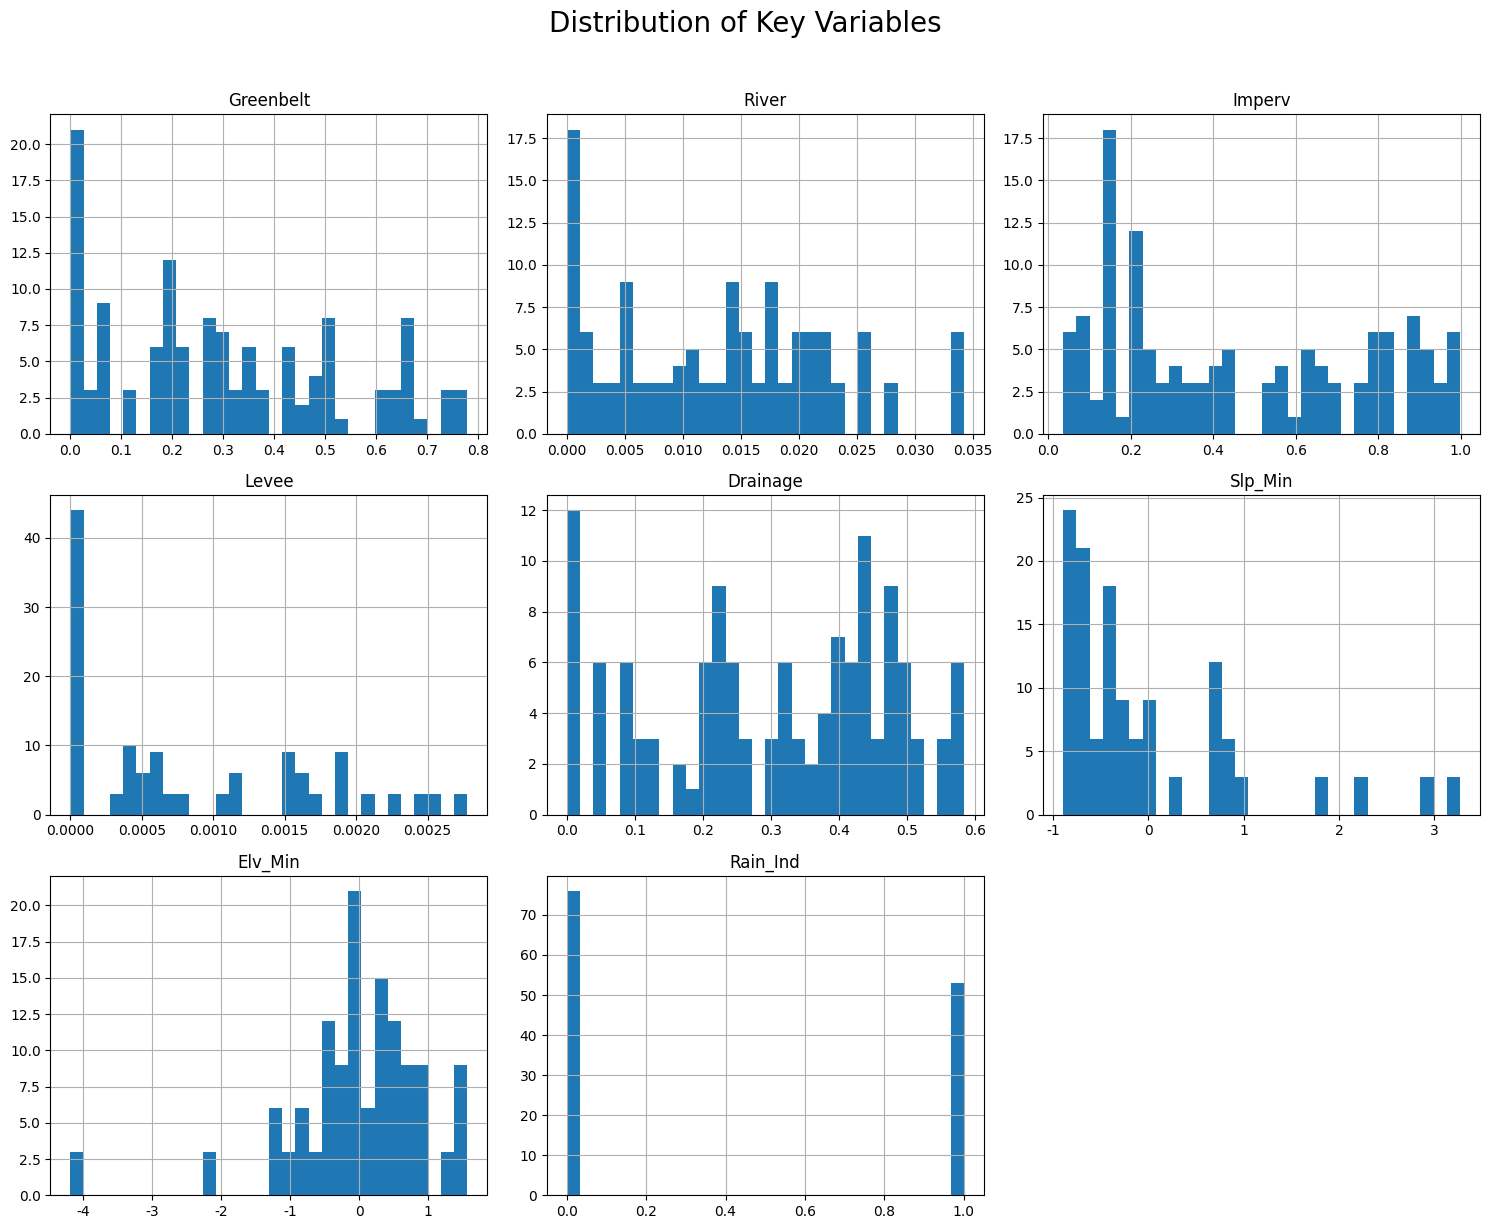

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램을 그릴 변수 리스트
cols_to_plot = ['Greenbelt', 'River', 'Imperv', 'Levee', 'Drainage','Slp_Min', 'Elv_Min', 'Rain_Ind']

# 한글 폰트 설정 (Mac과 Windows에 따라 다름)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['font.family'] = 'AppleGothic' # Mac
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 히스토그램 그리기
final[cols_to_plot].hist(figsize=(15, 12), bins=30)
plt.suptitle('Distribution of Key Variables', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. 분석할 독립변수 선택
var = final[['Greenbelt', 'River', 'Imperv', 'Levee', 'Drainage','Slp_Min', 'Elv_Min', 'Rain_Ind']]

# 2. 상수항 추가 (VIF 계산용)
X_const = add_constant(var)

# 3. VIF 계산
vif_data = pd.DataFrame()
vif_data['variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)

    variable         VIF
0      const  161.625312
1  Greenbelt   12.746880
2      River    1.989269
3     Imperv   14.120566
4      Levee    2.326418
5   Drainage    2.285833
6    Slp_Min    1.887168
7    Elv_Min    1.505659
8   Rain_Ind    1.181967


In [ ]:
# feature importance 위한 종속변수 (y)와 독립변수 (X) 설정
import numpy as np

final['침수피해_log']=np.log1p(final['침수피해'])
y = final['침수피해_log'].values
X_names = ['Greenbelt', 'River', 'Drainage','Slp_Min', 'Elv_Min', 'Rain_Ind', 'Levee']
X = final[X_names].values

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# RandomForestRegressor 모델을 200개의 트리를 사용하여 초기화
model = RandomForestRegressor(n_estimators=200)
model.fit(X, y)

# 순열 중요도 (Permutation Importance) 계산
# n_repeats=10: 중요도를 10번 반복하여 계산하여 안정적인 값 도출
# random_state=42: 재현성을 위한 난수 시드 설정
result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
perm_importances = pd.Series(result.importances_mean, index=final[X_names].columns)
perm_importances.sort_values(ascending=False, inplace=True)
print("\n랜덤 포레스트 Permutation Importance:\n", perm_importances)


랜덤 포레스트 Permutation Importance:
 Rain_Ind     1.283682
Levee        0.239902
Drainage     0.174954
River        0.164911
Greenbelt    0.092581
Elv_Min      0.087508
Slp_Min      0.062615
dtype: float64


In [ ]:
# 모델 성능 확인 후 변수 개수를 줄이기 위해 vif가 가장 큰 Levee 변수 제거
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 1. 분석할 독립변수 선택
var = final[['Greenbelt', 'River', 'Levee', 'Drainage','Rain_Ind']]

# 2. 상수항 추가 (VIF 계산용)
X_const = add_constant(var)

# 3. VIF 계산
vif_data = pd.DataFrame()
vif_data['variable'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data)

    variable       VIF
0      const  8.845071
1  Greenbelt  1.012959
2      River  1.822752
3      Levee  1.878905
4   Drainage  1.161894
5   Rain_Ind  1.003849


In [ ]:
# 최종 분석에 사용할 종속변수 (y)와 독립변수 (X) 설정
import numpy as np

final['침수피해_log']=np.log1p(final['침수피해'])
y = final['침수피해_log'].values
X_names = ['Greenbelt', 'River', 'Drainage', 'Rain_Ind']
X = final[X_names].values

In [ ]:
# spreg를 위해 X에 상수항(intercept) 추가

X = np.hstack((np.ones((final.shape[0], 1)), X))

# OLS 모델 실행
ols = spreg.OLS(y, X, name_y='FLOOD', name_x=['intercept'] + X_names)

print("--- OLS 결과 ---")
print(ols.summary)

--- OLS 결과 ---
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :       FLOOD                Number of Observations:         129
Mean dependent var  :      2.6846                Number of Variables   :           5
S.D. dependent var  :      5.5242                Degrees of Freedom    :         124
R-squared           :      0.3672
Adjusted R-squared  :      0.3468
Sum squared residual:     2471.94                F-statistic           :     17.9865
Sigma-square        :      19.935                Prob(F-statistic)     :   1.137e-11
S.E. of regression  :       4.465                Log likelihood        :    -373.508
Sigma-square ML     :      19.162                Akaike info criterion :     757.016
S.E of regression ML:      4.3775                Schwarz criterion     :     771.315

---------------------------------------------

In [ ]:
## 4. 공간 회귀 모형 (SLM & SEM) 실행
# ----------------------------------------------------------------------

# 4-1. 공간 지연 모형 (Spatial Lag Model, SLM)
# 종속변수의 공간적 확산 효과를 고려
slm = spreg.ML_Lag(y, X, w=w, name_y='CRIME', name_x=['intercept'] + X_names)
print("\n--- 공간 지연 모형 (SLM) 결과 ---")
print(slm.summary)
# rho(ρ) 계수가 이웃 종속변수의 영향력을 나타냅니다.

# 4-2. 공간 오차 모형 (Spatial Error Model, SEM)
# 측정되지 않은 공간적 요인의 영향을 통제 (오차항의 자기상관)
sem = spreg.ML_Error(y, X, w=w, name_y='CRIME', name_x=['intercept'] + X_names)
print("\n--- 공간 오차 모형 (SEM) 결과 ---")
print(sem.summary)
# lambda(λ) 계수가 오차항의 공간적 자기상관 정도를 나타냅니다.


--- 공간 지연 모형 (SLM) 결과 ---
REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       CRIME                Number of Observations:         129
Mean dependent var  :      2.6846                Number of Variables   :           6
S.D. dependent var  :      5.5242                Degrees of Freedom    :         123
Pseudo R-squared    :      0.3708
Spatial Pseudo R-squared:  0.3649
Log likelihood      :   -373.2266
Sigma-square ML     :     19.0531                Akaike info criterion :     758.453
S.E of regression   :      4.3650                Schwarz criterion     :     775.612

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------

/usr/local/lib/python3.12/dist-packages/spreg/ml_error.py:184: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  res = minimize_scalar(


**-> SLM은 유의하지 않고, SEM만 유의하므로 최종적으로 SEM 모델 실행**

In [ ]:
# SEM 모델 실행
sem = spreg.ML_Error(y, X, w=w, name_y='FLOOD', name_x=['intercept'] + X_names)

# 모델의 잔차(residuals)를 GeoDataFrame에 새로운 열로 추가
# sem.u 가 바로 잔차에 해당합니다.
final['residual'] = sem.u

/usr/local/lib/python3.12/dist-packages/spreg/ml_error.py:184: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  res = minimize_scalar(


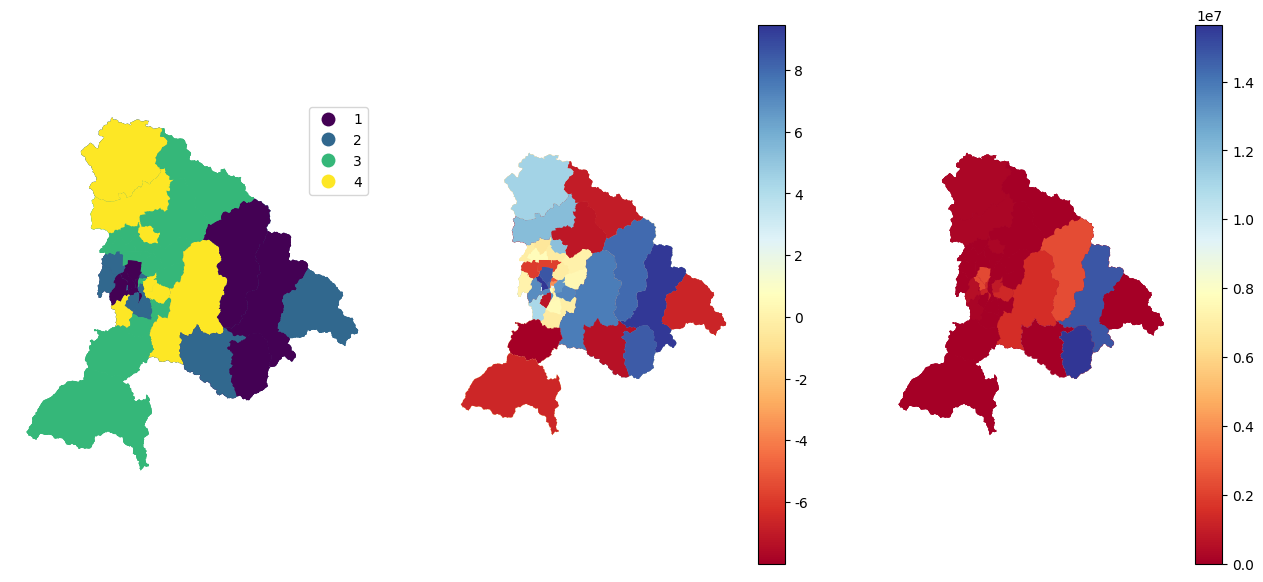

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 7))

# 왼쪽: LISA 클러스터 맵 (어디가 문제 지역인가?)
final.plot(column='lisa_clust', categorical=True, legend=True, ax=axes[0], cmap='viridis')
axes[0].set_axis_off()

# 중간: SEM 잔차 맵 (어디에 숨겨진 요인이 있는가?)
final.plot(column='residual', cmap='RdYlBu', legend=True, ax=axes[1])
axes[1].set_axis_off()

# 오른쪽: 침수피해 맵 (얼마나 침수피해가 발생했는가?)
final.plot(column='침수피해', cmap='RdYlBu', legend=True, ax=axes[2])
axes[2].set_axis_off()

In [ ]:
!pip install -q geopandas mgwr pysal spglm

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

from spglm.family import Binomial

In [ ]:
y = final['침수피해_log'].values.reshape(-1, 1)

In [ ]:
# GeoDataFrame 'final'의 geometry 열에서 각 도형의 중심점(centroid)을 추출
# .x는 중심점의 경도(longitude), .y는 위도(latitude)를 나타냄
# np.vstack: 추출된 x와 y 좌표 배열을 수직(vertical)으로 쌓아 2xN 형태의 배열 생성
# .T: 배열의 행과 열을 바꿔 N x 2 형태의 배열로 최종 변환
# 결과적으로 'coords' 변수는 각 도형의 (x, y) 좌표 쌍을 담은 NumPy 배열이 됨
coords = np.vstack([final.geometry.centroid.x, final.geometry.centroid.y]).T

In [ ]:
# Sel_BW 객체 초기화
# coords: 지리적 좌표 (경도, 위도)
# y: 종속 변수 (예측하려는 값)
# X: 독립 변수 (예측에 사용되는 특성)
# family=Binomial(): 종속 변수가 이항 분포를 따름 (예: 0 또는 1)
# kernel='bisquare': 가중치를 계산하는 커널 함수 ('bisquare'는 특정 범위 내 데이터에 가중치를 부여)
# fixed=False: 가변 대역폭(adaptive bandwidth)을 사용 (각 데이터 포인트마다 다른 대역폭을 적용)

bw_selector = Sel_BW(coords, y, X, family=Binomial(), kernel='bisquare', fixed=False)
best_bw = bw_selector.search(bw_max=80)
best_bw

np.float64(76.0)

In [ ]:
print("\n4단계: GWLR 모델 실행...")
# family=Binomial() 옵션을 통해 로지스틱 회귀분석 수행
model = GWR(coords, y, X ,76, kernel='bisquare')
results = model.fit()
print("모델 실행 완료.")


4단계: GWLR 모델 실행...
모델 실행 완료.


In [ ]:
print("\n--- 모델 성능 요약 ---")
print(f"AIC: {results.aic:.3f}")
print(f"AICc: {results.aicc:.3f}")
print("--------------------")


--- 모델 성능 요약 ---
AIC: 743.588
AICc: 751.221
--------------------


In [ ]:
# GWR 분석 결과 확인
print(results.summary())

Model type                                                         Gaussian
Number of observations:                                                 129
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           2471.942
Log-likelihood:                                                    -373.508
AIC:                                                                757.016
AICc:                                                               759.705
BIC:                                                               1869.325
R2:                                                                   0.367
Adj. R2:                                                              0.347

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
X_names = ['Intercept', 'Greenbelt','River',
    'Drainage', 'Rain_Ind']

# 모델 결과에서 계수(coefficient) 값을 추출하여 데이터프레임으로 변환
coeffs_df = pd.DataFrame(results.params, columns=X_names)

In [ ]:
# 'Intercept'(절편) 열을 제외하고, 모든 계수 값에 절댓값(absolute value)을 적용
# 계수의 절댓값은 변수의 영향력(중요도)을 나타냄 (부호와 무관하게)
abs_coeffs_df = coeffs_df.drop(columns=['Intercept']).abs()

# 각 행(row, 즉 각 관측치)별로 가장 큰 절댓값을 가진 2개의 변수(컬럼) 이름을 찾음
top_2_vars = abs_coeffs_df.apply(lambda row: row.nlargest(2).index.tolist(), axis=1)

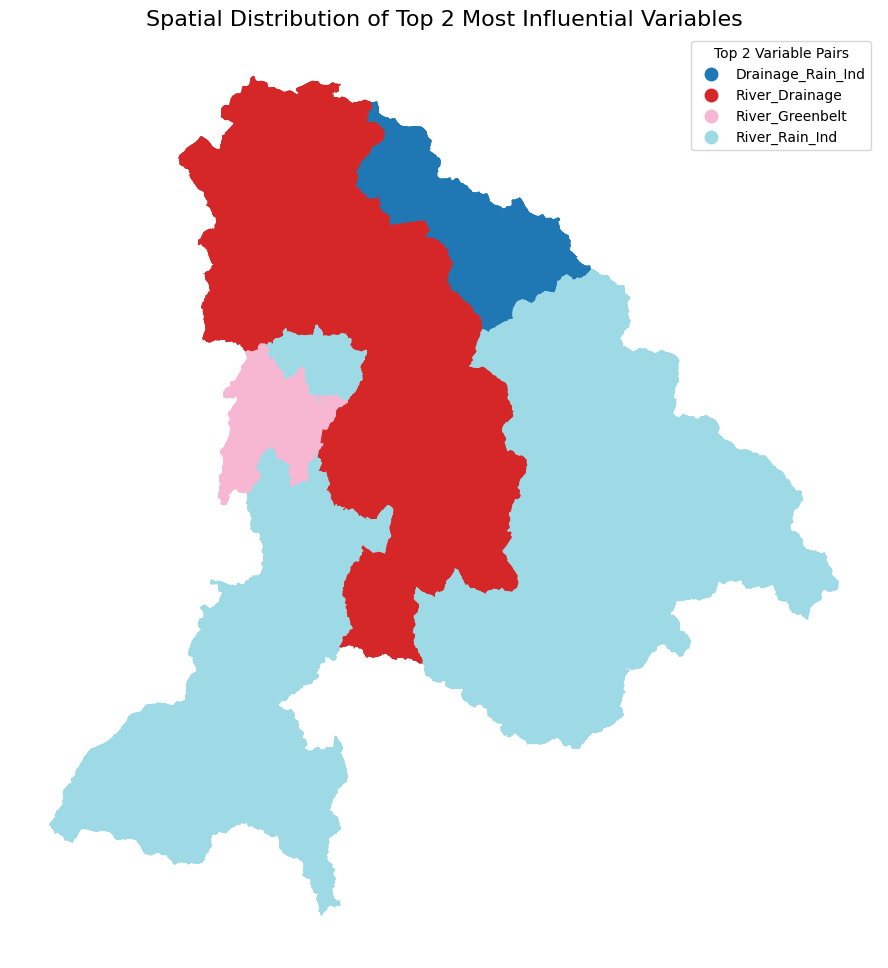

In [ ]:
# 리스트를 문자열로 변환하여 그룹핑
final['top_2_group'] = top_2_vars.apply(lambda x: '_'.join(x))

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# GeoDataFrame 'final'을 사용하여 지도 시각화
# column='top_2_group': 시각화에 사용할 데이터 열로, 위에서 만든 그룹핑 열을 지정

final.plot(
    column='top_2_group',
    categorical=True,
    legend=True,
    cmap='tab20',
    ax=ax,
    legend_kwds={'title': 'Top 2 Variable Pairs'}
)

ax.set_title('Spatial Distribution of Top 2 Most Influential Variables', fontsize=16)
ax.set_axis_off()

plt.show()

In [ ]:
final = final.rename(columns={
    '침수피해_log': 'flood_log',
    'top_2_group': 'top_2'
})
final

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,Sum,동,Greenbelt,River,Imperv,Farmland,Levee,...,POP,BLD,IC_DIST,TRAI_DIST,GARA_DIST,geometry,flood_log,residual,top_2_vars,top_2
0,44131101,Daeheung-dong,대흥동,227372.2,대흥동,0.000000,0.000000,0.998386,0.000000,0.000000,...,729,511,3.04,7.49,0.14,"POLYGON ((968747.454 1868265.138, 968746.957 1...",0.000000,2.897015,"[River, Rain_Ind]",River_Rain_Ind
1,44131102,Seonghwang-dong,성황동,376867.0,성황동,0.002913,0.018582,0.897794,0.043633,0.000000,...,1416,738,2.37,7.94,0.36,"POLYGON ((968773.015 1868252.121, 968773.015 1...",0.000000,1.365340,"[River, Drainage]",River_Drainage
2,44131103,Munhwa-dong,문화동,219518.1,문화동,0.000005,0.000000,0.996984,0.001567,0.000000,...,6425,429,2.87,7.51,0.29,"POLYGON ((968773.015 1868252.121, 968773.015 1...",0.000000,2.897005,"[River, Drainage]",River_Drainage
3,44131104,Sajik-dong,사직동,253674.0,사직동,0.061910,0.022320,0.889567,0.009445,0.000000,...,1271,848,4.40,6.07,0.23,"POLYGON ((968796.642 1867370.378, 968799.161 1...",0.000000,0.701816,"[River, Rain_Ind]",River_Rain_Ind
4,44131105,Yeongseong-dong,영성동,262185.8,영성동,0.000000,0.034201,0.807008,0.031291,0.001545,...,2318,518,4.13,6.32,0.53,"POLYGON ((969017.757 1867414.43, 969018.178 18...",0.000000,-0.639169,"[River, Rain_Ind]",River_Rain_Ind
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,44133111,Budae-dong,부대동,3237052.0,부대동,0.358031,0.005223,0.197487,0.453797,0.000633,...,2429,486,4.00,10.32,2.42,"POLYGON ((970654.628 1872151.901, 970682.234 1...",0.000000,-0.308452,"[River, Rain_Ind]",River_Rain_Ind
125,44133250,Seonghwan-eup,성환읍,57031392.5,성환읍,0.324649,0.023628,0.206462,0.559899,0.002533,...,22054,7621,9.23,14.74,3.75,"POLYGON ((965794.161 1885898.908, 965821.523 1...",12.337053,4.434511,"[River, Drainage]",River_Drainage
126,44133253,Seonggeo-eup,성거읍,31459500.2,성거읍,0.480417,0.013453,0.219027,0.341465,0.001602,...,21704,3501,4.95,16.24,2.90,"POLYGON ((973534.741 1879393.55, 973535.425 18...",0.000000,-7.167481,"[River, Drainage]",River_Drainage
127,44133256,Jiksan-eup,직산읍,30518629.7,직산읍,0.341249,0.009006,0.209849,0.503493,0.001925,...,19486,4150,6.16,13.79,3.88,"POLYGON ((971469.607 1880476.651, 971437.081 1...",12.290510,5.322214,"[River, Drainage]",River_Drainage


In [ ]:
final = final.drop(columns=['geometry_y', 'top_2_vars_tuple'])
final = final.drop(columns=['top_2'])
final

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,Sum,동,Greenbelt,River,Imperv,Farmland,Levee,...,침수피해,POP,BLD,IC_DIST,TRAI_DIST,GARA_DIST,geometry,flood_log,residual,top_2_vars
0,44131101,Daeheung-dong,대흥동,227372.2,대흥동,0.000000,0.000000,0.998386,0.000000,0.000000,...,0.0,729,511,3.04,7.49,0.14,"POLYGON ((968747.454 1868265.138, 968746.957 1...",0.000000,2.897015,"[River, Rain_Ind]"
1,44131102,Seonghwang-dong,성황동,376867.0,성황동,0.002913,0.018582,0.897794,0.043633,0.000000,...,0.0,1416,738,2.37,7.94,0.36,"POLYGON ((968773.015 1868252.121, 968773.015 1...",0.000000,1.365340,"[River, Drainage]"
2,44131103,Munhwa-dong,문화동,219518.1,문화동,0.000005,0.000000,0.996984,0.001567,0.000000,...,0.0,6425,429,2.87,7.51,0.29,"POLYGON ((968773.015 1868252.121, 968773.015 1...",0.000000,2.897005,"[River, Drainage]"
3,44131104,Sajik-dong,사직동,253674.0,사직동,0.061910,0.022320,0.889567,0.009445,0.000000,...,0.0,1271,848,4.40,6.07,0.23,"POLYGON ((968796.642 1867370.378, 968799.161 1...",0.000000,0.701816,"[River, Rain_Ind]"
4,44131105,Yeongseong-dong,영성동,262185.8,영성동,0.000000,0.034201,0.807008,0.031291,0.001545,...,0.0,2318,518,4.13,6.32,0.53,"POLYGON ((969017.757 1867414.43, 969018.178 18...",0.000000,-0.639169,"[River, Rain_Ind]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,44133111,Budae-dong,부대동,3237052.0,부대동,0.358031,0.005223,0.197487,0.453797,0.000633,...,0.0,2429,486,4.00,10.32,2.42,"POLYGON ((970654.628 1872151.901, 970682.234 1...",0.000000,-0.308452,"[River, Rain_Ind]"
125,44133250,Seonghwan-eup,성환읍,57031392.5,성환읍,0.324649,0.023628,0.206462,0.559899,0.002533,...,227988.0,22054,7621,9.23,14.74,3.75,"POLYGON ((965794.161 1885898.908, 965821.523 1...",12.337053,4.434511,"[River, Drainage]"
126,44133253,Seonggeo-eup,성거읍,31459500.2,성거읍,0.480417,0.013453,0.219027,0.341465,0.001602,...,0.0,21704,3501,4.95,16.24,2.90,"POLYGON ((973534.741 1879393.55, 973535.425 18...",0.000000,-7.167481,"[River, Drainage]"
127,44133256,Jiksan-eup,직산읍,30518629.7,직산읍,0.341249,0.009006,0.209849,0.503493,0.001925,...,217620.0,19486,4150,6.16,13.79,3.88,"POLYGON ((971469.607 1880476.651, 971437.081 1...",12.290510,5.322214,"[River, Drainage]"


In [ ]:
# 태블로 대시보드 제작을 위해 최종 데이터 내보내기
final.to_file('final.shp', driver='ESRI Shapefile', encoding='cp949')

**TRAFFIC 변수 생성 과정**

In [ ]:
df=pd.read_excel("천안시_정책.xlsx")
df

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry,계,동,녹지,하천,불투수면,농경지,...,ALTITUDE MAX,토양배수능(poor),침수,area,height,IC_DISTANCE,TRAIN_DISTANCE,GARAGE_DISTANCE,POPULATION,BUILDING
0,44131101,Daeheung-dong,대흥동,POLYGON ((127.14961448604429 36.81205091429977...,227371.2,대흥동,0.0,0.0,153383.2,0.0,...,40.423740,0,0,0,0,3.04,7.49,0.14,729,511
1,44131102,Seonghwang-dong,성황동,"POLYGON ((127.1499015944674 36.81193441921396,...",377983.0,성황동,9355.0,0.0,327832.0,16058.0,...,57.111542,2,0,0,0,2.37,7.94,0.36,1416,738
2,44131103,Munhwa-dong,문화동,"POLYGON ((127.1499015944674 36.81193441921396,...",223319.1,문화동,1.0,0.0,220960.1,344.0,...,51.279709,0,0,0,0,2.87,7.51,0.29,6425,429
3,44131104,Sajik-dong,사직동,POLYGON ((127.15020263842388 36.80398667860601...,253625.0,사직동,16309.0,0.0,201859.0,2396.0,...,41.974751,3,0,0,0,4.40,6.07,0.23,1271,848
4,44131105,Yeongseong-dong,영성동,POLYGON ((127.15267955433873 36.80439105344806...,262353.8,영성동,900.0,592.0,213788.0,7301.0,...,35.994873,7,0,0,0,4.13,6.32,0.53,2318,518
5,44131106,Oryong-dong,오룡동,"POLYGON ((127.1513179532155 36.80649757719204,...",113550.0,오룡동,6898.0,0.0,105383.0,0.0,...,47.543652,2,0,0,0,3.38,6.42,0.54,483,238
6,44131107,Wonseong-dong,원성동,POLYGON ((127.15383349660638 36.80948936157716...,2031081.0,원성동,130667.3,620.0,1582724.4,224936.0,...,92.428009,89,1,49033,71,3.18,8.10,1.72,14767,3231
7,44131108,Guseong-dong,구성동,POLYGON ((127.18488797483327 36.80214641866075...,3969283.5,구성동,2010452.5,0.0,1086631.6,802032.0,...,287.324982,127,1,36695,35,4.70,8.48,1.91,9794,1214
8,44131109,Cheongsu-dong,청수동,POLYGON ((127.16058004785101 36.79150857552029...,709153.4,청수동,152109.3,1601.0,381348.0,117489.0,...,68.152557,24,0,0,0,5.11,6.78,0.96,9490,442
9,44131110,Samnyong-dong,삼룡동,POLYGON ((127.18558080794602 36.79264178909049...,4011121.8,삼룡동,2033118.8,1603.0,939483.9,825784.0,...,258.468079,86,0,0,0,4.84,8.64,1.73,2655,526


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

df['IC_proximity'] = 1 - MinMaxScaler().fit_transform(df[['IC_DISTANCE']])
df['Train_proximity'] = 1 - MinMaxScaler().fit_transform(df[['TRAIN_DISTANCE']])
df['Garage_proximity'] = 1 - MinMaxScaler().fit_transform(df[['GARAGE_DISTANCE']])

# 회귀 모델 구축
X = df[['IC_proximity', 'Train_proximity', 'Garage_proximity']]
y = df['침수']

model = LinearRegression()
model.fit(X, y)

# 회귀 계수 (Coefficients) 추출
# 이 계수들이 각 변수의 가중치가 됩니다.
coefficients = model.coef_
coefficients_rounded = [round(c, 2) for c in coefficients]

# 결과 출력
print("회귀 계수:", coefficients)

회귀 계수: [-0.39590801  0.26042294 -0.27826283]


In [ ]:
# MinMaxScaler를 이용한 표준화
scaler = MinMaxScaler()
df[['IC_norm', 'Train_norm', 'Garage_norm']] = scaler.fit_transform(df[['IC_DISTANCE', 'TRAIN_DISTANCE', 'GARAGE_DISTANCE']])

In [ ]:
# 가중치 설정 (예시: IC 0.5, Train 0.3, 주차장 0.2)
weights = {'IC_norm': 0.4, 'Train_norm': 0.3, 'Garage_norm': 0.3}

# 가중 평균 계산
df['transport_index'] = (df['IC_norm'] * weights['IC_norm'] +
                         df['Train_norm'] * weights['Train_norm'] +
                         df['Garage_norm'] * weights['Garage_norm'])

# 거리가 가까울수록(위험도가 높을수록) 지수가 높게 나오도록 반전
# (1 - 표준화된 값)을 사용하면 됩니다.
df['transport_index_inverted'] = ((1 - df['IC_norm']) * weights['IC_norm'] +
                                  (1 - df['Train_norm']) * weights['Train_norm'] +
                                  (1 - df['Garage_norm']) * weights['Garage_norm'])
print(df)

      EMD_CD         EMD_ENG_NM EMD_KOR_NM  \
0   44131101      Daeheung-dong        대흥동   
1   44131102    Seonghwang-dong        성황동   
2   44131103        Munhwa-dong        문화동   
3   44131104         Sajik-dong        사직동   
4   44131105    Yeongseong-dong        영성동   
5   44131106        Oryong-dong        오룡동   
6   44131107      Wonseong-dong        원성동   
7   44131108       Guseong-dong        구성동   
8   44131109      Cheongsu-dong        청수동   
9   44131110      Samnyong-dong        삼룡동   
10  44131111    Cheongdang-dong        청당동   
11  44131112       Yuryang-dong        유량동   
12  44131113    Bongmyeong-dong        봉명동   
13  44131114          Daga-dong        다가동   
14  44131115       Yonggok-dong        용곡동   
15  44131116       Sinbang-dong        신방동   
16  44131117     Ssangyong-dong        쌍용동   
17  44131118         Sinbu-dong        신부동   
18  44131119         Anseo-dong        안서동   
19  44131120       Guryong-dong        구룡동   
20  44131250       Mokcheon-eup   